<a href="https://colab.research.google.com/github/WatcharachaiSk/colab/blob/main/Summary_Ticket_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-0afdbfbb1351>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sla_counts = data.groupby(['MONTH', 'SLA']).size().unstack(fill_value=0).reset_index()


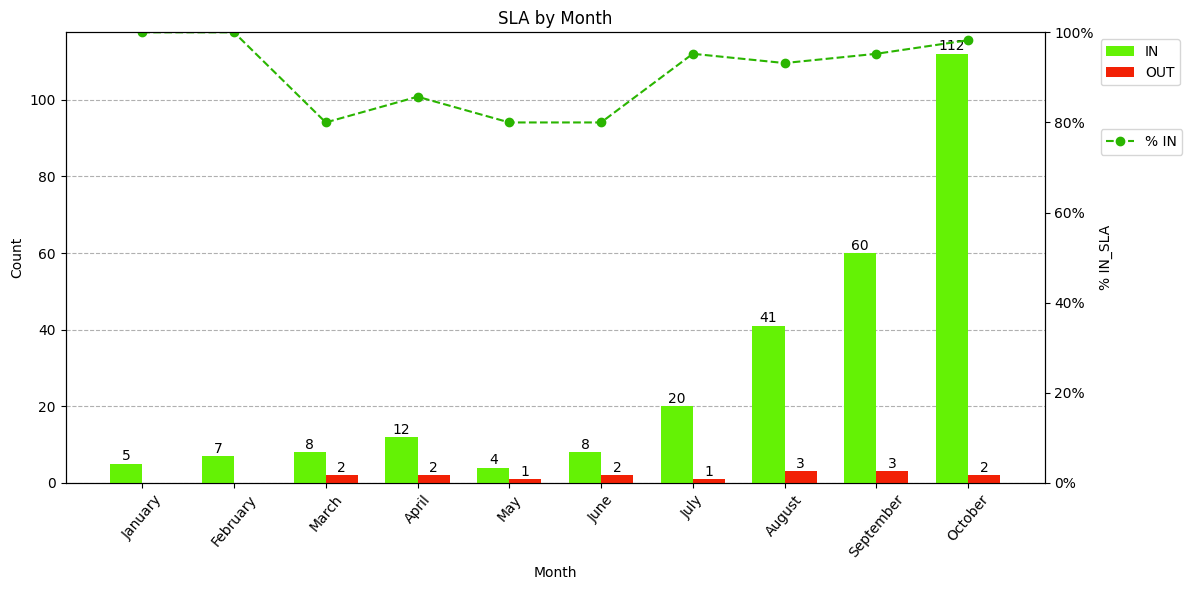

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'SLA'])

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# คำนวณจำนวนของ IN_SLA และ OUT_SLA สำหรับแต่ละ MONTH
sla_counts = data.groupby(['MONTH', 'SLA']).size().unstack(fill_value=0).reset_index()

# คำนวณเปอร์เซ็นต์ของ IN_SLA ต่อเดือน
sla_counts['% IN_SLA'] = (sla_counts['IN_SLA'] / (sla_counts['IN_SLA'] + sla_counts['OUT_SLA'])) * 100

# กรองข้อมูลให้เหลือเฉพาะเดือนที่มีข้อมูล
sla_counts = sla_counts[(sla_counts['IN_SLA'] > 0) | (sla_counts['OUT_SLA'] > 0)]

# สร้างกราฟ
fig, ax1 = plt.subplots(figsize=(12, 6))

# กำหนดตำแหน่งแท่งของแต่ละเดือน และความกว้างของแท่ง
x = np.arange(len(sla_counts['MONTH']))  # ตำแหน่งของแต่ละเดือน
width = 0.35  # ความกว้างของแท่ง

# สร้างแท่งสำหรับ IN_SLA และ OUT_SLA โดยแยกกัน
#bars1 = ax1.bar(x - width/2, sla_counts['IN_SLA'], width, label='IN_SLA', color='green', alpha=0.8)
#bars2 = ax1.bar(x + width/2, sla_counts['OUT_SLA'], width, label='OUT_SLA', color='red', alpha=0.8)
bars1 = ax1.bar(x - width/2, sla_counts['IN_SLA'], width, label='IN', color='#64f205', zorder=3)
bars2 = ax1.bar(x + width/2, sla_counts['OUT_SLA'], width, label='OUT', color='#f22105', zorder=3)

# แสดงจำนวนบนแท่ง (เฉพาะค่าที่ไม่ใช่ 0)
for i in range(len(sla_counts['MONTH'])):
    if sla_counts['IN_SLA'][i] > 0:
        ax1.text(x[i] - width/2, sla_counts['IN_SLA'][i] + 0.1, int(sla_counts['IN_SLA'][i]), ha='center', va='bottom')
    if sla_counts['OUT_SLA'][i] > 0:
        ax1.text(x[i] + width/2, sla_counts['OUT_SLA'][i] + 0.1, int(sla_counts['OUT_SLA'][i]), ha='center', va='bottom')

# การตั้งค่ากราฟแท่ง
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_xticks(x)
ax1.set_xticklabels(sla_counts['MONTH'], rotation=50)
ax1.grid(axis='y', linestyle='--',zorder=0)

# เพิ่มแกน y อันที่สองสำหรับกราฟเส้นของ % IN_SLA
ax2 = ax1.twinx()
ax2.plot(x, sla_counts['% IN_SLA'], color='#2ab500', linestyle='--', marker='o', label='% IN')  # เปลี่ยนเป็นเส้นปะ
ax2.set_ylabel('% IN_SLA')
ax2.set_ylim(0, 100)  # ตั้งค่าให้แกน y ของเปอร์เซ็นต์เริ่มจาก 0 ถึง 100

# ฟังก์ชันสำหรับแสดงค่าเป็นเปอร์เซ็นต์
def to_percent(y, pos):
    return f'{int(y)}%'

# ตั้งรูปแบบการแสดงผลให้แกน y ของ ax2 เป็นเปอร์เซ็นต์
ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))

# ตั้งเลเจนด์ให้อยู่ด้านล่าง
#ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15), bbox_transform=ax1.transAxes, ncol=2)  # เลเจนด์ของกราฟแท่ง
#ax2.legend(loc='upper left', bbox_to_anchor=(0.5, -0.25), bbox_transform=ax2.transAxes, ncol=2)  # เลเจนด์ของกราฟเส้น
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # เลเจนด์ของกราฟแท่ง
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.8))  # เลเจนด์ของกราฟเส้น

# การตั้งค่าชื่อและรูปแบบของกราฟ
plt.title('SLA by Month')
plt.tight_layout()

plt.show()


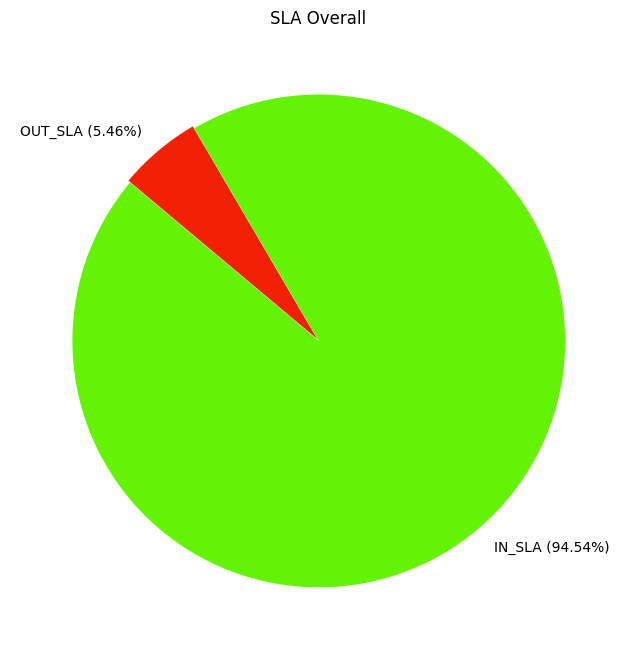

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['SLA'])

# นับจำนวนของแต่ละกลุ่มใน TK_GROUP
group_counts = data['SLA'].value_counts()

# กำหนดสีที่ต้องการสำหรับแต่ละกลุ่ม
colors = {
    'IN_SLA': '#64f205',
    'OUT_SLA': '#f22105',
}

color = [colors.get(col, '#D3D3D3') for col in group_counts.index]  # กำหนดสี default เป็น #D3D3D3 (สีเทา)

# สร้าง explode array เพื่อเพิ่มระยะห่างระหว่างแต่ละ slice
explode = [0.005] * len(group_counts)  # ระยะห่างเล็กน้อย (0.1) สำหรับทุก slice

labels = [f"{label} ({pct:.2f}%)" for label, pct in zip(group_counts.index, 100 * group_counts / group_counts.sum())]

# สร้างกราฟ pie
plt.figure(figsize=(8, 8))
#plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=color ,explode=explode)
#plt.pie(group_counts, labels=group_counts.index, autopct=lambda pct: func(pct, group_counts), startangle=140, explode=explode)
plt.pie(group_counts, labels=labels, startangle=140, colors=color ,explode=explode)
plt.title('SLA Overall')
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'SLA', 'TK_NO', 'Problem', 'Solution', 'out_reason'])

# กำหนดให้แสดงเฉพาะเดือน October และ SLA เป็น OUT_SLA
filtered_data = data[(data['MONTH'] == 'October') & (data['SLA'] == 'OUT_SLA')]

# เลือกคอลัมน์ที่ต้องการแสดง
result = filtered_data[['TK_NO', 'Problem', 'Solution', 'out_reason']]

# แสดง DataFrame ใน Google Colab ที่มี style
styled_result = result.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#ffcc66'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('border', '1px solid black'), ('padding', '8px')]
    }]
).set_properties(**{
    'background-color': '#f7f7f7',
    'border': '1px solid black',
    'text-align': 'left'  # จัดตำแหน่งข้อมูลในตารางให้อยู่ทางซ้าย
})

# ใช้ display() เพื่อแสดง DataFrame ที่มีการจัด style
display(styled_result)


,TK_NO,Problem,Solution,out_reason
188,JB24-1537045,PPRCW801G-[null]SitePriority=|HIGH CPU USAGE-WARNING: CPU Idle = 17.31%-PPRCW801G_nagCPU.,สาเหตุเกิดจากช่วงก่อนหน้ามี activity upgrade firmware FortiGate จึงทำให้เกิด downtime เป็นช่วงๆ job ที่มีการทำงานในช่วงนั้นเลยได้รับผลกระทบข้อมูลโหลดมากเกินไป หลังจากเสร็จ activity สักพัก cpu กลับมาทำงานปกติครับ,ประสานงานตรวจสอบหาสาเหตุกับ ทีม system ครับ
193,JB24-1543591,SUB-PRIVILEGE-AZ-PRD-[null]SitePriority=|ICTS-msg[Average of KqlQueryAggregatedValue is 1.28 (thd=greaterthan 1.00) ] desc[This alarm monitor Priv P95 response time is greater than 1 ms] time[2024-10-19 07:16:14]-2|AZURE_APPGW_RESPONSETIME|.,Alarm Clear,-


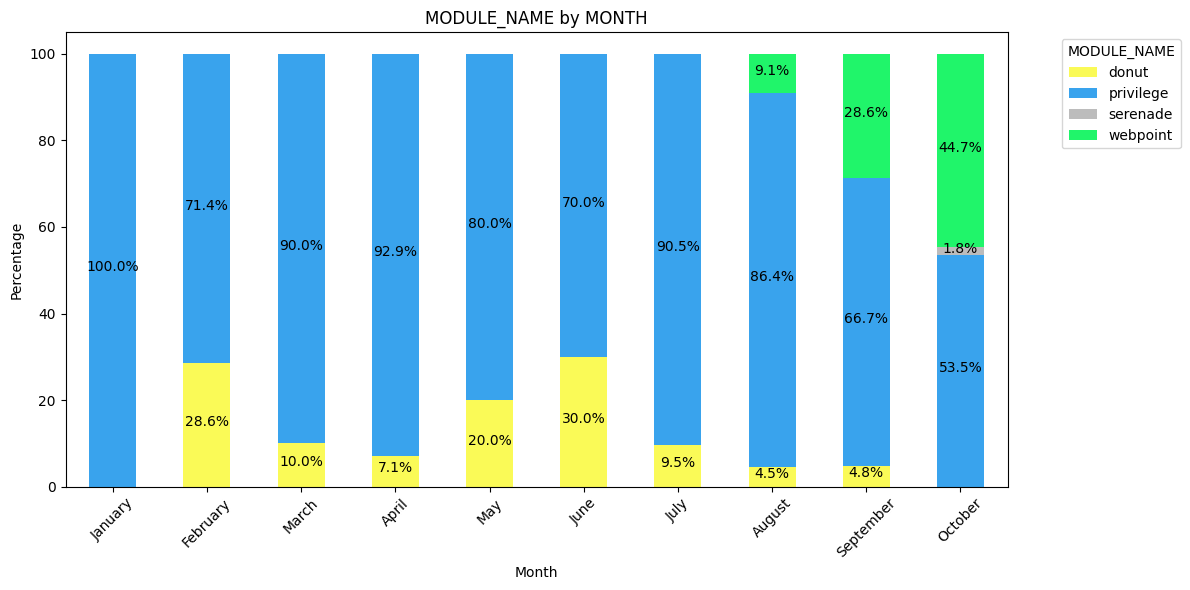

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'MODULE_NAME'])

# แปลง MODULE_NAME ที่มีคำว่า 'Aispoints' ให้เป็น 'Webpoint'
data['MODULE_NAME'] = data['MODULE_NAME'].str.replace('Aispoints', 'Webpoint', case=False)

# แปลง MODULE_NAME เป็นตัวพิมพ์เล็ก
data['MODULE_NAME'] = data['MODULE_NAME'].str.lower()

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# นับจำนวน MODULE_NAME สำหรับแต่ละ MONTH
module_counts = data.groupby(['MONTH', 'MODULE_NAME'], observed=False).size().unstack(fill_value=0)

# กรองเฉพาะเดือนที่มีข้อมูล (ผลรวมของแถวไม่เป็น 0)
module_counts = module_counts.loc[module_counts.sum(axis=1) > 0]

# คำนวณเปอร์เซ็นต์
module_percent = module_counts.div(module_counts.sum(axis=1), axis=0) * 100

# กำหนดสีสำหรับแต่ละ MODULE_NAME
color_mapping = {
    'donut': '#fafa57',
    'privilege': '#39a3ed',
    'webpoint': '#20f56a',
    'serenade': '#bcbcbc'
}
colors = [color_mapping.get(module, '#D3D3D3') for module in module_percent.columns]

# สร้างกราฟแท่งแบบซ้อน
ax = module_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# การตั้งค่ากราฟ
ax.set_xlabel('Month')
ax.set_ylabel('Percentage')
ax.set_title('MODULE_NAME by MONTH')
ax.set_xticklabels(module_percent.index, rotation=45)
plt.legend(title='MODULE_NAME', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงค่าตัวเลขบนแท่ง (แสดงเหนือกราฟ)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # แสดงค่าถ้าไม่ใช่ 0
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        xytext=(0, 2),  # เลื่อนข้อความขึ้นเล็กน้อย
                        textcoords='offset points',
                        ha='center', va='center')

# ปรับรูปแบบให้สวยงาม
plt.tight_layout()

plt.show()


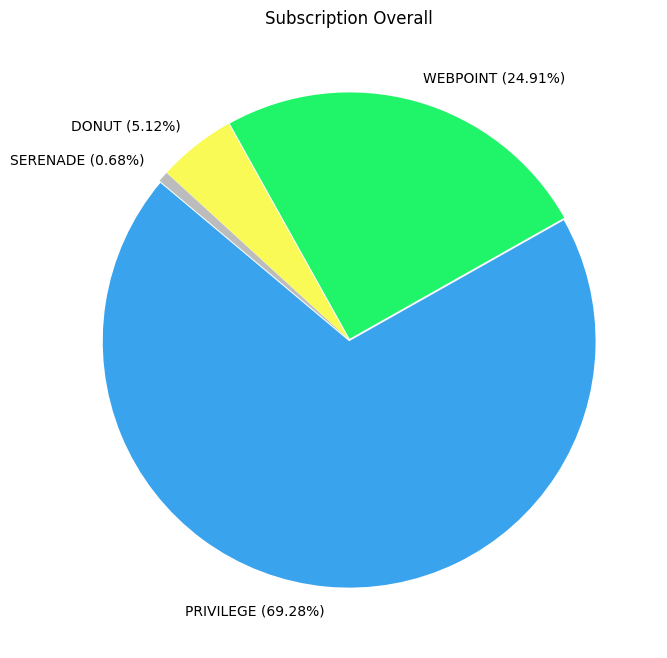

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MODULE_NAME'])

# แปลง MODULE_NAME ที่มีคำว่า 'Aispoints' ให้เป็น 'Webpoint'
data['MODULE_NAME'] = data['MODULE_NAME'].str.replace('Aispoints', 'Webpoint', case=False)

# แปลง MODULE_NAME เป็นตัวพิมพ์เล็ก
data['MODULE_NAME'] = data['MODULE_NAME'].str.upper()

# นับจำนวนของแต่ละกลุ่มใน MODULE_NAME
group_counts = data['MODULE_NAME'].value_counts()

# กำหนดสีที่ต้องการสำหรับแต่ละกลุ่ม
colors = {
    'DONUT': '#fafa57',
    'PRIVILEGE': '#39a3ed',
    'WEBPOINT': '#20f56a',
    'SERENADE': '#bcbcbc'
}

color = [colors.get(col, '#D3D3D3') for col in group_counts.index]  # กำหนดสี default เป็น #D3D3D3 (สีเทา)

# สร้าง explode array เพื่อเพิ่มระยะห่างระหว่างแต่ละ slice
explode = [0.005] * len(group_counts)  # ระยะห่างเล็กน้อย (0.005) สำหรับทุก slice

labels = [f"{label} ({pct:.2f}%)" for label, pct in zip(group_counts.index, 100 * group_counts / group_counts.sum())]

# สร้างกราฟ pie
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=labels, startangle=140, colors=color, explode=explode)
plt.title('Subscription Overall')
plt.show()


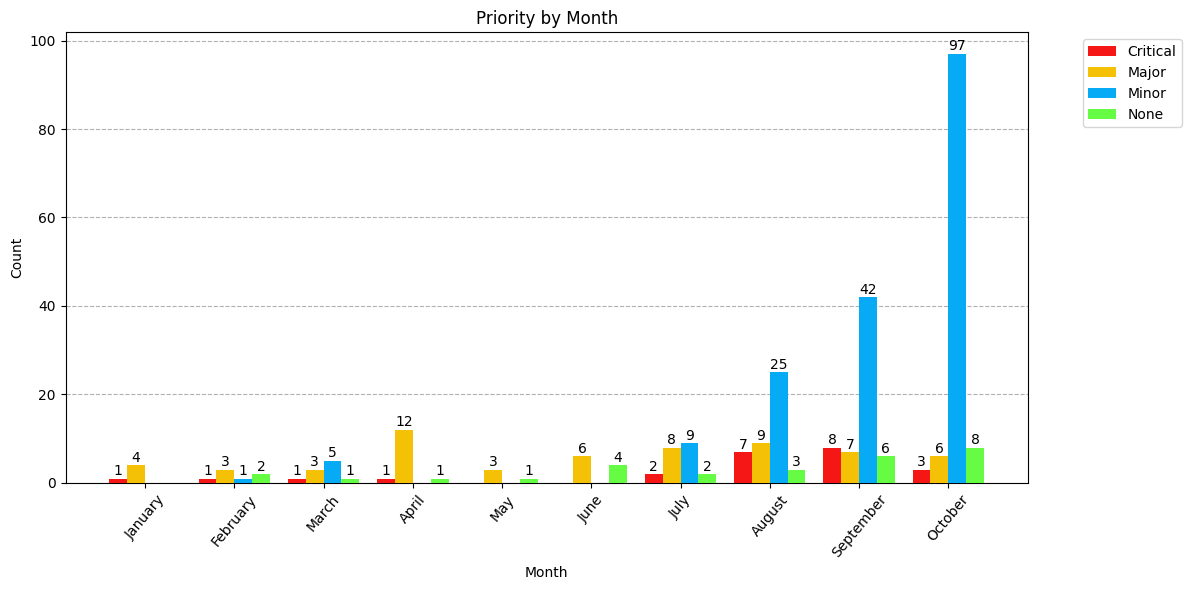

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'Priority'])

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# คำนวณจำนวนของ Critical, Major, Minor และ - สำหรับแต่ละ MONTH
priority_counts = data.groupby(['MONTH', 'Priority'],observed=False).size().unstack(fill_value=0).reset_index()
#print(priority_counts)  # ตรวจสอบข้อมูล

# กรองข้อมูลให้เหลือเฉพาะเดือนที่มีข้อมูล
priority_counts = priority_counts[(priority_counts['Critical'] > 0) | (priority_counts['Major'] > 0)|(priority_counts['Minor'] > 0)|(priority_counts['-'] > 0)]

# สร้างกราฟ
fig, ax1 = plt.subplots(figsize=(12, 6))

# กำหนดตำแหน่งแท่งของแต่ละเดือน และความกว้างของแท่ง
x = np.arange(len(priority_counts['MONTH']))  # ตำแหน่งของแต่ละเดือน
width = 0.2  # ความกว้างของแท่ง

# สร้างแท่งสำหรับ Critical, Major, Minor และ - โดยแยกกัน
bars1 = ax1.bar(x - 1.5 * width, priority_counts['Critical'], width, label='Critical', color='#f51616', zorder=3)
bars2 = ax1.bar(x - 0.5 * width, priority_counts['Major'], width, label='Major', color='#f5c107', zorder=3)
bars3 = ax1.bar(x + 0.5 * width, priority_counts['Minor'], width, label='Minor', color='#07aaf5', zorder=3)
bars4 = ax1.bar(x + 1.5 * width, priority_counts['-'], width, label='None', color='#66fc44', zorder=3)

# แสดงจำนวนบนแท่ง (เฉพาะค่าที่ไม่ใช่ 0)
for i in range(len(priority_counts['MONTH'])):
    if priority_counts['Critical'][i] > 0:
        ax1.text(x[i] - 1.5 * width, priority_counts['Critical'][i] + 0.1, int(priority_counts['Critical'][i]), ha='center', va='bottom')
    if priority_counts['Major'][i] > 0:
        ax1.text(x[i] - 0.5 * width, priority_counts['Major'][i] + 0.1, int(priority_counts['Major'][i]), ha='center', va='bottom')
    if priority_counts['Minor'][i] > 0:
        ax1.text(x[i] + 0.5 * width, priority_counts['Minor'][i] + 0.1, int(priority_counts['Minor'][i]), ha='center', va='bottom')
    if priority_counts['-'][i] > 0:
        ax1.text(x[i] + 1.5 * width, priority_counts['-'][i] + 0.1, int(priority_counts['-'][i]), ha='center', va='bottom')

# การตั้งค่ากราฟแท่ง
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_xticks(x)
ax1.set_xticklabels(priority_counts['MONTH'], rotation=50)
ax1.grid(axis='y', linestyle='--',zorder=0)

# ตั้งเลเจนด์ให้อยู่ด้านนอก
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # เลเจนด์ของกราฟแท่ง

# การตั้งค่าชื่อและรูปแบบของกราฟ
plt.title('Priority by Month')
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
from IPython.display import display

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'Priority'])

# แปลงค่า Priority จาก '-' เป็น 'None'
data['Priority'] = data['Priority'].replace('-', 'None')

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October']

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# นับจำนวนของแต่ละ Priority ตามเดือน
priority_counts = data.groupby(['Priority', 'MONTH']).size().unstack(fill_value=0)

# เพิ่มแถวผลรวมของแต่ละเดือน
priority_counts.loc['Total'] = priority_counts.sum()

# สร้างตารางด้วย Pandas Styler
styled_table = priority_counts.style.set_table_styles(
    [
        # จัดแต่งหัวข้อของตาราง
        {
            'selector': 'thead th',
            'props': [
                ('background-color', '#ffcc66'),  # สีเหลืองสำหรับหัวตาราง
                ('color', 'black'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('border', '1px solid black')  # เส้นขอบหัวตาราง
            ]
        },
        # จัดแต่งข้อมูลในตาราง
        {
            'selector': 'tbody td',
            'props': [
                ('border', '1px solid black'),  # เส้นขอบข้อมูลในตาราง
                ('padding', '10px'),            # ระยะห่างภายในเซลล์
                ('text-align', 'center'),       # จัดให้อยู่กึ่งกลาง
            ]
        },
        # จัดแต่งแถวผลรวม
        {
            'selector': 'tbody tr:last-child',
            'props': [
                ('font-weight', 'bold'),
                ('background-color', '#ffeb99')  # สีพื้นหลังสำหรับแถวผลรวม
            ]
        }
    ]
).set_properties(
    **{
        'text-align': 'center',
        'background-color': '#ffffff',  # สีพื้นหลังของข้อมูลในตาราง
        'padding': '10px',
        'border': '1px solid black'  # เส้นขอบรอบเซลล์ทั้งหมด
    }
)

# แสดงตารางที่จัดแต่ง
display(styled_table)


<ipython-input-101-32f9e580e4b3>:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



MONTH,January,February,March,April,May,June,July,August,September,October
Priority,,,,,,,,,,
Critical,1,1,1,1,0,0,2,7,8,3
Major,4,3,3,12,3,6,8,9,7,6
Minor,0,1,5,0,0,0,9,25,42,97
None,0,2,1,1,1,4,2,3,6,8
Total,5,7,10,14,4,10,21,44,63,114


In [ ]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ Excel
file_path = '/content/Ticket_summary.xlsx'
df = pd.read_excel(file_path, sheet_name='sheet1')

# จัดกลุ่มข้อมูลตาม TK_GROUP และนับจำนวนปัญหาแต่ละประเภท
# summary = df.groupby(['TK_GROUP', 'Problem']).size().reset_index(name='Count')

# สรุปปัญหาในแต่ละ TK_GROUP
summary_agg = summary.groupby('TK_GROUP').apply(
    lambda x: ', '.join(f"{prob} ({count})" for prob, count in zip(x['Problem'], x['Count']))
).reset_index(name='Summary')

# แสดงสรุปปัญหาในแต่ละ TK_GROUP
for index, row in summary_agg.iterrows():
    print(f"{row['TK_GROUP']}:\n{row['Summary']}\n")


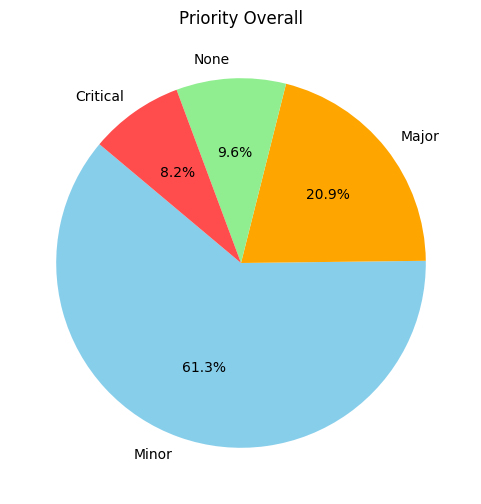

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจากไฟล์ Excel
file_path = '/content/Ticket_summary.xlsx'
df = pd.read_excel(file_path, sheet_name='sheet1')

# แปลงค่า Priority จาก '-' เป็น 'None'
df['Priority'] = df['Priority'].replace('-', 'None')

# นับจำนวนของแต่ละ Priority และคำนวณเปอร์เซ็นต์
priority_counts = df['Priority'].value_counts()
priority_percent = (priority_counts / priority_counts.sum()) * 100

# กำหนดสีสำหรับแต่ละ Priority
colors = {
    'Critical': '#ff4c4c',
    'Major': '#ffa500',
    'Minor': '#87ceeb',
    'None': '#90ee90'
}

# กำหนดสีตามลำดับของ priority_counts
color_list = [colors.get(priority, '#D3D3D3') for priority in priority_counts.index]

# สร้างกราฟ Pie
plt.figure(figsize=(6, 6))
plt.pie(priority_percent, labels=priority_percent.index, colors=color_list, autopct='%1.1f%%', startangle=140)
plt.title('Priority Overall')

# แสดงกราฟ
plt.show()


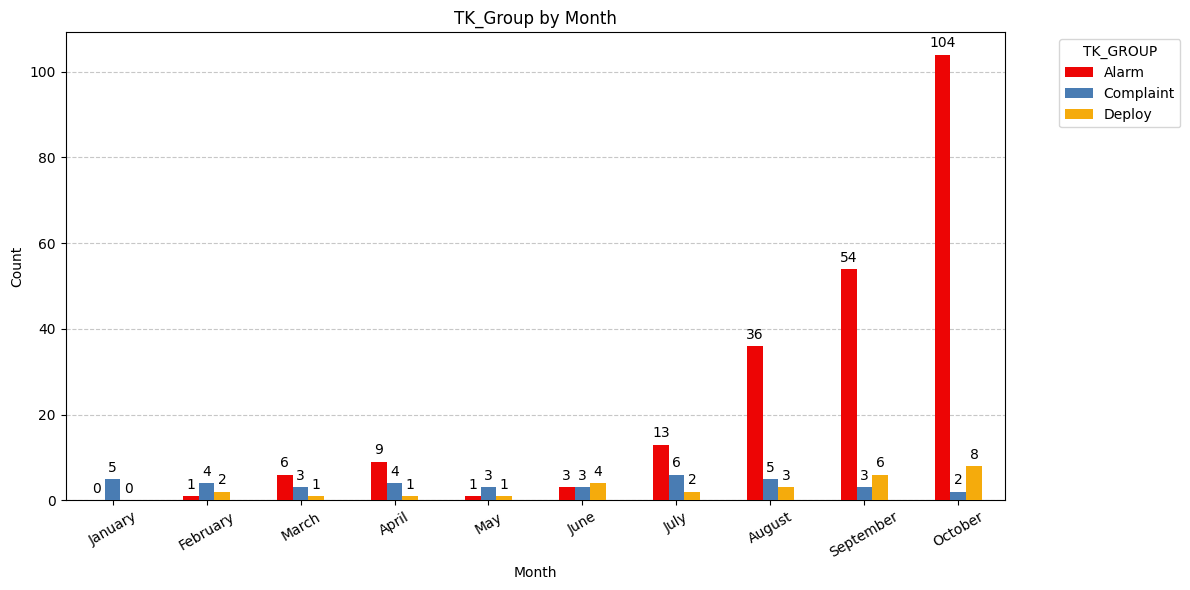

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'TK_GROUP'])

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# แทนค่าอื่นๆ ที่ไม่ใช่ 'Alarm' หรือ 'Deploy' ด้วย 'Complaint'
data['TK_GROUP'] = data['TK_GROUP'].apply(lambda x: x if x in ['Alarm', 'Deploy'] else 'Complaint')

# คำนวณจำนวนของ Complaint, Alarm, และ Deploy สำหรับแต่ละ MONTH
group_counts = data.groupby(['MONTH', 'TK_GROUP'],observed=False).size().unstack(fill_value=0).reset_index()

# กรองข้อมูลให้เหลือเฉพาะเดือนที่มีข้อมูล
group_counts = group_counts[(group_counts['Alarm'] > 0) | (group_counts['Deploy'] > 0)|(group_counts['Complaint'] > 0)]

# กำหนดสีที่ต้องการสำหรับแต่ละกลุ่ม
colors = {
    'Alarm': '#ed0505',
    'Deploy': '#f5ab0c',
    'Complaint': '#497cb3'
}

# สร้างกราฟแท่งแบบแยกกลุ่ม พร้อมกำหนดสี
fig, ax = plt.subplots(figsize=(12, 6))
group_counts.set_index('MONTH').plot(kind='bar', stacked=False, ax=ax ,color=colors, zorder=3)

# เพิ่มการแสดงค่าบนแท่งกราฟ
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

  # เพิ่ม grid ที่แกน Y และทำให้กราฟอยู่หน้า grid
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# ตั้งชื่อแกนและกราฟ
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('TK_Group by Month')
plt.xticks(rotation=30)  # ตั้งให้ชื่อเดือนอยู่ในแนวอ่านง่าย

# ตั้งตำแหน่ง legend ให้อยู่ด้านขวาของกราฟ
plt.legend(title='TK_GROUP', bbox_to_anchor=(1.05, 1), loc='upper left')

# จัดรูปแบบ layout
plt.tight_layout()

# แสดงกราฟ
plt.show()






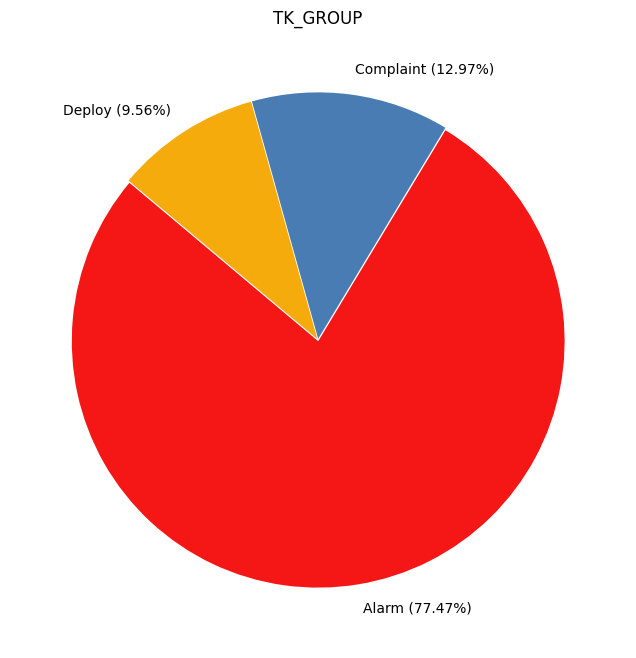

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['TK_GROUP'])

# แทนค่าอื่นๆ ที่ไม่ใช่ 'Alarm' หรือ 'Deploy' ด้วย 'Complaint'
data['TK_GROUP'] = data['TK_GROUP'].apply(lambda x: x if x in ['Alarm', 'Deploy'] else 'Complaint')

# นับจำนวนของแต่ละกลุ่มใน TK_GROUP
group_counts = data['TK_GROUP'].value_counts()

# กำหนดสีที่ต้องการสำหรับแต่ละกลุ่ม
colors = {
    'Alarm': '#f51616',
    'Deploy': '#f5ab0c',
    'Complaint': '#497cb3'
}

color = [colors.get(col, '#D3D3D3') for col in group_counts.index]  # กำหนดสี default เป็น #D3D3D3 (สีเทา)

# สร้าง explode array เพื่อเพิ่มระยะห่างระหว่างแต่ละ slice
explode = [0.005] * len(group_counts)  # ระยะห่างเล็กน้อย (0.1) สำหรับทุก slice

labels = [f"{label} ({pct:.2f}%)" for label, pct in zip(group_counts.index, 100 * group_counts / group_counts.sum())]

# สร้างกราฟ pie
plt.figure(figsize=(8, 8))
#plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=color ,explode=explode)
#plt.pie(group_counts, labels=group_counts.index, autopct=lambda pct: func(pct, group_counts), startangle=140, explode=explode)
plt.pie(group_counts, labels=labels, startangle=140, colors=color ,explode=explode)
plt.title('TK_GROUP')
plt.show()


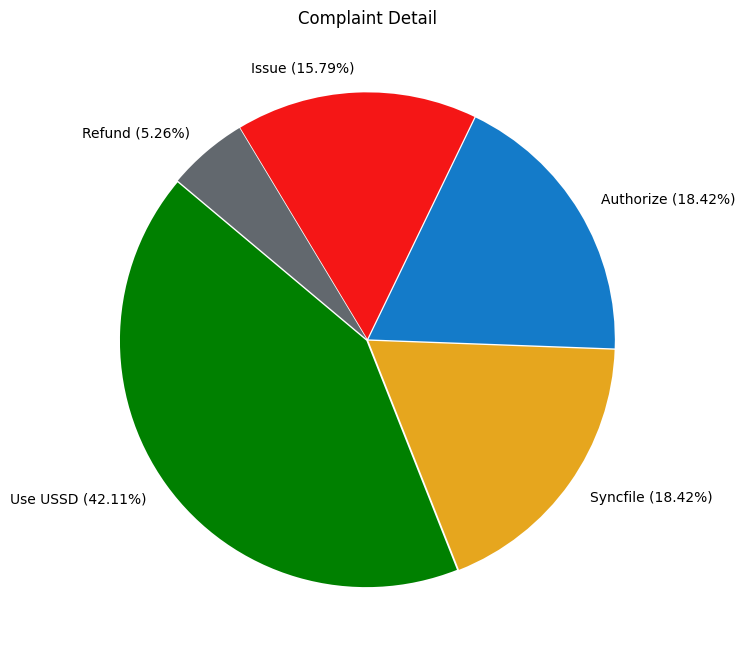

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['TK_GROUP'])

# กรองข้อมูลโดยไม่เอาค่าที่เป็น 'Alarm' และ 'Deploy'
filtered_data = data[~data['TK_GROUP'].isin(['Alarm', 'Deploy'])]

# นับจำนวนของแต่ละกลุ่มใน TK_GROUP หลังจากกรองแล้ว
group_counts = filtered_data['TK_GROUP'].value_counts()

# กำหนดสีที่ต้องการสำหรับแต่ละกลุ่ม
colors = {
    'Authorize': '#147bc9',
    'Refund': '#62686e',
    'Issue': '#f51616',
    'Syncfile': '#e6a61e',
    'Use USSD': 'green'
}

color = [colors.get(col, '#D3D3D3') for col in group_counts.index]  # กำหนดสี default เป็น #D3D3D3 (สีเทา)

# สร้าง explode array เพื่อเพิ่มระยะห่างระหว่างแต่ละ slice
explode = [0.005] * len(group_counts)  # ระยะห่างเล็กน้อย (0.1) สำหรับทุก slice

labels = [f"{label} ({pct:.2f}%)" for label, pct in zip(group_counts.index, 100 * group_counts / group_counts.sum())]

# สร้างกราฟ pie
plt.figure(figsize=(8, 8))
#plt.pie(group_counts, labels=lebels, autopct='%1.1f%%', startangle=140, colors=color ,explode=explode)
plt.pie(group_counts, labels=labels, startangle=140, colors=color ,explode=explode)
plt.title('Complaint Detail')
plt.show()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


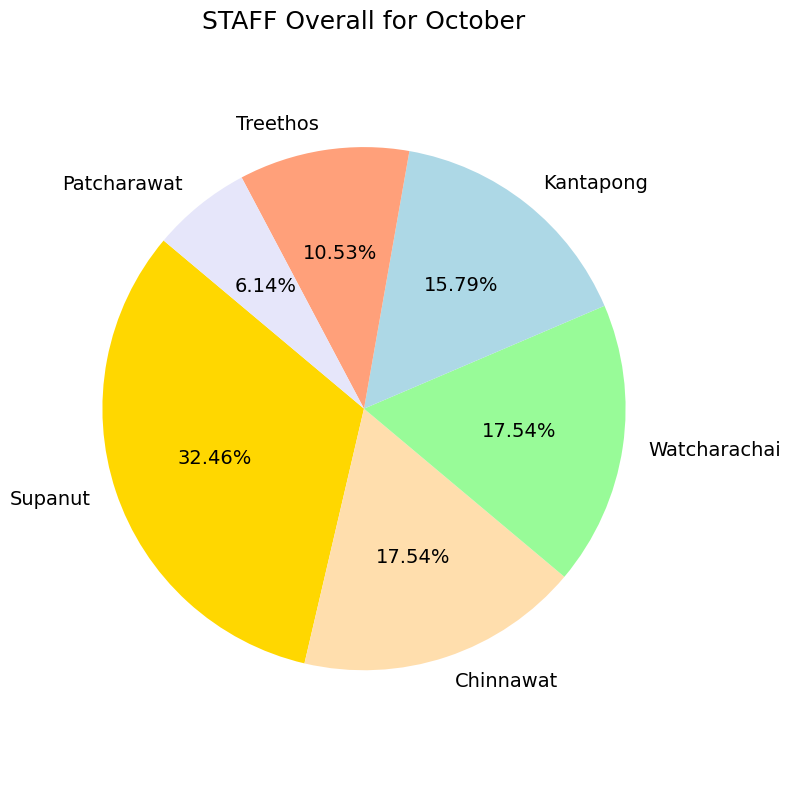

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'STAFF'])

# กรองข้อมูลให้เลือกเฉพาะ MONTH ที่เป็น 'October'
october_data = data[data['MONTH'] == 'October']

title = 'STAFF Overall for October'

# นับจำนวนการทำงานของแต่ละ STAFF ในเดือน October
staff_counts_october = october_data['STAFF'].value_counts()

# สร้างกราฟวงกลมด้วยสีพาสเทล
pastel_colors = [
    '#FFD700',  # สีเหลืองทอง
    '#FFDEAD',  # สีเนื้ออ่อน
    '#98FB98',  # สีเขียวมิ้นต์อ่อน
    '#ADD8E6',  # สีฟ้าเบบี้บลู
    '#FFA07A',  # สีส้มแซลมอนอ่อน
    '#E6E6FA',  # สีม่วงลาเวนเดอร์
    '#FFB6C1',  # สีชมพูอ่อน
    '#FF9999',  # สีแดงอ่อน
    '#87CEEB',  # สีฟ้าอ่อน
    '#90EE90',  # สีเขียวอ่อน
]

plt.figure(figsize=(8, 8))

# ปรับขนาดฟอนต์ในกราฟวงกลม
plt.pie(
    staff_counts_october,
    labels=staff_counts_october.index,
    autopct='%1.2f%%',
    startangle=140,
    colors=pastel_colors[:len(staff_counts_october)],
    textprops={'fontsize': 14}  # กำหนดขนาดของฟอนต์ (14 คือขนาดที่เพิ่มขึ้น)
)

plt.title(title, fontsize=18)  # ปรับขนาดฟอนต์ของชื่อกราฟ
plt.axis('equal')  # ให้กราฟเป็นวงกลมที่สัดส่วนเท่ากัน
plt.tight_layout()

plt.show()


In [30]:
import pandas as pd

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'STAFF'])

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October']

# กำหนดลำดับของ STAFF
assign_to_list = [
    'Supaporn',
    'Treethos',
    'Chinnawat',
    'Watcharachai',
    'Supanut',
    'Patcharawat',
    'Kantapong'
]

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# นับจำนวนการทำงานของแต่ละ STAFF ในแต่ละเดือน
staff_counts = data.groupby(['STAFF', 'MONTH']).size().unstack(fill_value=0)

# เรียงลำดับ STAFF ตามที่กำหนด
staff_counts = staff_counts.reindex(assign_to_list + [name for name in staff_counts.index if name not in assign_to_list], fill_value=0)

# เพิ่มแถว "Total" เพื่อหาผลรวมในแต่ละเดือน
staff_counts.loc['Total'] = staff_counts.sum()

# สร้างตารางด้วย Pandas Styler
styled_table = staff_counts.style.set_table_styles(
    [
        # จัดแต่งหัวข้อของตาราง
        {
            'selector': 'thead th',
            'props': [
                ('background-color', '#ffcc66'),  # สีเหลืองสำหรับหัวตาราง
                ('color', 'black'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('border', '1px solid black')  # เส้นขอบหัวตาราง
            ]
        },
        # จัดแต่งข้อมูลในตาราง
        {
            'selector': 'tbody td',
            'props': [
                ('border', '1px solid black'),  # เส้นขอบข้อมูลในตาราง
                ('padding', '10px'),            # ระยะห่างภายในเซลล์
                ('text-align', 'center'),       # จัดให้อยู่กึ่งกลาง
            ]
        },
        # จัดแต่งแถว Total
        {
            'selector': 'tbody tr:last-child td',
            'props': [
                ('background-color', '#b3e5fc'),  # สีฟ้าสำหรับแถว Total
                ('font-weight', 'bold')
            ]
        }
    ]
).set_properties(
    **{
        'text-align': 'center',
        'background-color': '#ffffff',  # สีพื้นหลังของข้อมูลในตาราง
        'padding': '10px',
        'border': '1px solid black'  # เส้นขอบรอบเซลล์ทั้งหมด
    }
)

# แสดงตารางที่จัดแต่ง
display(styled_table)


<ipython-input-30-a005871b1d45>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  staff_counts = data.groupby(['STAFF', 'MONTH']).size().unstack(fill_value=0)


MONTH,January,February,March,April,May,June,July,August,September,October
STAFF,,,,,,,,,,
Supaporn,3,1,0,3,2,0,0,0,0,0
Treethos,0,5,7,8,1,6,13,15,10,12
Chinnawat,2,1,3,3,2,4,8,27,20,20
Watcharachai,0,0,0,0,0,0,0,0,9,20
Supanut,0,0,0,0,0,0,0,2,22,37
Patcharawat,0,0,0,0,0,0,0,0,2,7
Kantapong,0,0,0,0,0,0,0,0,0,18
Total,5,7,10,14,5,10,21,44,63,114


In [29]:
import pandas as pd

# โหลดข้อมูลจาก Excel
data = pd.read_excel('/content/Ticket_summary.xlsx', sheet_name='sheet1', usecols=['MONTH', 'STAFF'])

# กำหนดลำดับของเดือน
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October']

# กำหนดลำดับของ STAFF
assign_to_list = [
    'Supaporn',
    'Treethos',
    'Chinnawat',
    'Watcharachai',
    'Supanut',
    'Patcharawat',
    'Kantapong'
]

# แปลงคอลัมน์ MONTH เป็นประเภท categorical และตั้งค่าลำดับ
data['MONTH'] = pd.Categorical(data['MONTH'], categories=month_order, ordered=True)

# นับจำนวนการทำงานของแต่ละ STAFF ในแต่ละเดือน
staff_counts = data.groupby(['STAFF', 'MONTH']).size().unstack(fill_value=0)

# เรียงลำดับ STAFF ตามที่กำหนด
staff_counts = staff_counts.reindex(assign_to_list + [name for name in staff_counts.index if name not in assign_to_list], fill_value=0)

# คำนวณเปอร์เซ็นต์ของการทำงานของแต่ละ STAFF ในแต่ละเดือน
staff_percentage = staff_counts.div(staff_counts.sum(axis=0), axis=1) * 100

# เพิ่มแถว "Total" เพื่อหาผลรวมในแต่ละเดือน
staff_percentage.loc['Total'] = staff_percentage.sum()

# สร้างตารางด้วย Pandas Styler
styled_table = staff_percentage.style.format(precision=1).set_table_styles(
    [
        # จัดแต่งหัวข้อของตาราง
        {
            'selector': 'thead th',
            'props': [
                ('background-color', '#ffcc66'),  # สีเหลืองสำหรับหัวตาราง
                ('color', 'black'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('border', '1px solid black')  # เส้นขอบหัวตาราง
            ]
        },
        # จัดแต่งข้อมูลในตาราง
        {
            'selector': 'tbody td',
            'props': [
                ('border', '1px solid black'),  # เส้นขอบข้อมูลในตาราง
                ('padding', '10px'),            # ระยะห่างภายในเซลล์
                ('text-align', 'center'),       # จัดให้อยู่กึ่งกลาง
            ]
        },
        # จัดแต่งแถว Total
        {
            'selector': 'tbody tr:last-child td',
            'props': [
                ('background-color', '#b3e5fc'),  # สีฟ้าสำหรับแถว Total
                ('font-weight', 'bold')
            ]
        }
    ]
).set_properties(
    **{
        'text-align': 'center',
        'background-color': '#ffffff',  # สีพื้นหลังของข้อมูลในตาราง
        'padding': '10px',
        'border': '1px solid black'  # เส้นขอบรอบเซลล์ทั้งหมด
    }
)

# แสดงตารางที่จัดแต่ง
display(styled_table)


<ipython-input-29-114bebbfc94b>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  staff_counts = data.groupby(['STAFF', 'MONTH']).size().unstack(fill_value=0)


MONTH,January,February,March,April,May,June,July,August,September,October
STAFF,,,,,,,,,,
Supaporn,60.0,14.3,0.0,21.4,40.0,0.0,0.0,0.0,0.0,0.0
Treethos,0.0,71.4,70.0,57.1,20.0,60.0,61.9,34.1,15.9,10.5
Chinnawat,40.0,14.3,30.0,21.4,40.0,40.0,38.1,61.4,31.7,17.5
Watcharachai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.3,17.5
Supanut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,34.9,32.5
Patcharawat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,6.1
Kantapong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8
Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
